# Sanity check
!!Deprecated. Necessary data no longer present in repo!!
I want to check whether the expression data behaves as expected.
For that i will analyze the changes in gene expression of sample target genes.
It is expected that trends are not 100% clean due to noise but they should be discoverable anyways

## Over expression:
- we will start by analyzing gene TP53

In [4]:
# Read Data
import cmapPy.pandasGEXpress.parse as parse

data = parse.parse('level5_beta_trt_oe_n34171x12328.gctx')
df_level5_data = data.data_df


/home/johanna/Documents/Uni/Master/WiSe_2425/Masterarbeit/data/.venv/lib/python3.11/site-packages/cmapPy/pandasGEXpress/parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
/home/johanna/Documents/Uni/Master/WiSe_2425/Masterarbeit/data/.venv/lib/python3.11/site-packages/cmapPy/pandasGEXpress/parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))


In [1]:
# Read Metadata
import pandas as pd

df_cell_info = pd.read_csv('cellinfo_beta.txt', sep='\t')       # Metadata for cell lines
df_gene_info = pd.read_csv('geneinfo_beta.txt', sep='\t')       # Metadata for genes (the features of the data matrices)
df_sig_info = pd.read_csv('siginfo_beta.txt', sep='\t')       # Metadata for level 5 profiles
df_comp_info = pd.read_csv('compoundinfo_beta.txt', sep='\t')   # Metadata for cell lines 

/tmp/ipykernel_790167/1500185524.py:6: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sig_info = pd.read_csv('siginfo_beta.txt', sep='\t')       # Metadata for level 5 profiles


In [2]:
# get gene id for TP53
df_gene_info[df_gene_info['gene_symbol'] == 'TP53']
# gene id_ 7157

,gene_id,gene_symbol,ensembl_id,gene_title,gene_type,src,feature_space
2605,7157,TP53,ENSG00000141510,tumor protein p53,protein-coding,NCBI,landmark


In [5]:
# get some basic information about the data
print("average gene expression value: ", df_level5_data.mean().mean())
print("max gene expression value: ", df_level5_data.max().max())
print("min gene expression value: ", df_level5_data.min().min())


average gene expression value:  0.031923372
max gene expression value:  10.000002
min gene expression value:  -10.000001


average gene expression value for TP53:  -0.09152808
max gene expression value for TP53:  10.0
min gene expression value for TP53:  -10.0


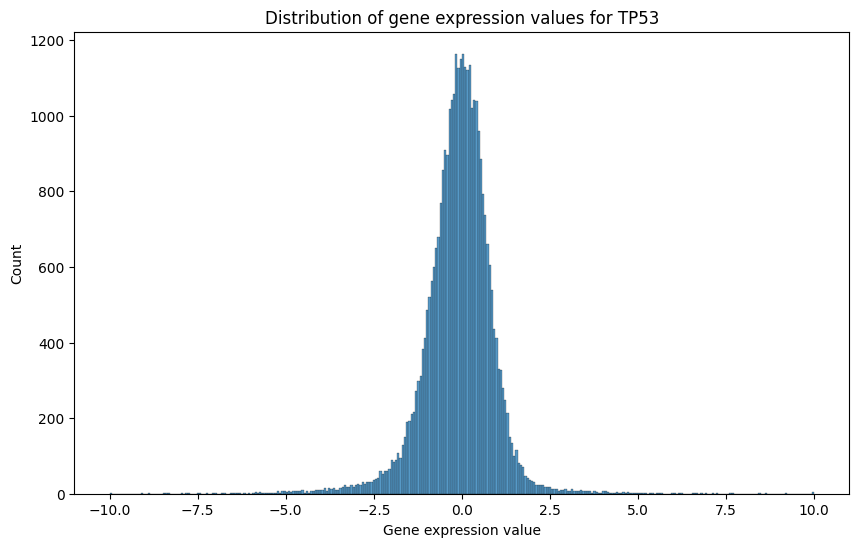

In [6]:
# get the gene expression values for TP53 (gene id: 7157)
df_TP53 = df_level5_data.loc["7157", :]

print("average gene expression value for TP53: ", df_TP53.mean())
print("max gene expression value for TP53: ", df_TP53.max())
print("min gene expression value for TP53: ", df_TP53.min())

# plot distribution of gene expression values
import matplotlib.pyplot as plt
import seaborn as sns

# plot the distribution of gene expression values for TP53. dont use deprecated distplot
plt.figure(figsize=(10, 6))
sns.histplot(df_TP53, kde=False)
plt.title('Distribution of gene expression values for TP53')
plt.xlabel('Gene expression value')

plt.show()

In [7]:
# use sig_info to get all rows with cmap_name = 'TP53'
df_sig_info_TP53 = df_sig_info[df_sig_info['cmap_name'] == 'TP53']
df_sig_info_TP53 = df_sig_info_TP53[df_sig_info_TP53['pert_type'] == 'trt_oe']

# get list with all pert_ids for TP53
pert_ids_TP53_target = df_sig_info_TP53['pert_id'].tolist()



In [8]:
# split df_TP53 into 2 dataframes. One contains the rows where the gene itself is target of the over expression, the other the rest.
# pert_ids_TP53_target contains the pert_ids for the rows where TP53 is the target of the over expression. 
# those ids should be in the string of the column names in df_level5_data
df_TP53_target = df_TP53[[col for col in df_TP53.index if any(pert_id in col for pert_id in pert_ids_TP53_target)]]
df_TP53_rest = df_TP53[[col for col in df_TP53.index if not any(pert_id in col for pert_id in pert_ids_TP53_target)]]

print('shape of df_TP53_target: ', df_TP53_target.shape)
print(len(pert_ids_TP53_target))
print('shape of df_TP53_rest: ', df_TP53_rest.shape)
print('shape of df_TP53: ', df_TP53.shape)

shape of df_TP53_target:  (514,)
517
shape of df_TP53_rest:  (33657,)
shape of df_TP53:  (34171,)


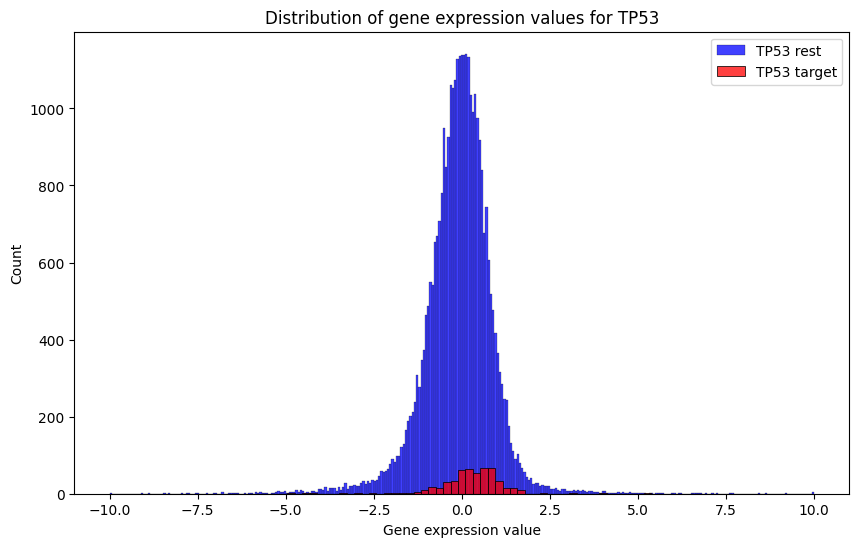

In [9]:
# create a plot that compares the distribution of gene expression values for TP53 when it is the target of the over expression and when it is not
plt.figure(figsize=(10, 6))
sns.histplot(df_TP53_rest, kde=False, color='blue', label='TP53 rest')
sns.histplot(df_TP53_target, kde=False, color='red', label='TP53 target')
plt.title('Distribution of gene expression values for TP53')
plt.xlabel('Gene expression value')
plt.legend()

plt.show()

In [10]:
# print average gene expression values for TP53 when it is the target of the over expression and when it is not
print("average gene expression value for TP53 when it is the target of the over expression: ", df_TP53_target.mean())
print("average gene expression value for TP53 when it is not the target of the over expression: ", df_TP53_rest.mean())

average gene expression value for TP53 when it is the target of the over expression:  0.26838803
average gene expression value for TP53 when it is not the target of the over expression:  -0.09702461


In [ ]:
df_level5_data.head()

cid,ERBB2003_A549_96H:A697T:-666,ERBB2003_A549_96H:BRDN0000553021:-666,ERBB2003_A549_96H:BRDN0000553411:-666,ERBB2003_A549_96H:BRDN0000553593:-666,ERBB2003_A549_96H:BRDN0000553655:-666,ERBB2003_A549_96H:BRDN0000560639:-666,ERBB2003_A549_96H:BRDN0000560659:-666,ERBB2003_A549_96H:BRDN0000560664:-666,ERBB2003_A549_96H:BRDN0000560676:-666,ERBB2003_A549_96H:BRDN0000560688:-666,...,TA.OE015_A549_96H:TRCN0000480221:-666,TA.OE015_A549_96H:TRCN0000480395:-666,TA.OE015_A549_96H:TRCN0000480678:-666,TA.OE015_A549_96H:TRCN0000481165:-666,TA.OE015_A549_96H:TRCN0000481366:-666,TA.OE015_A549_96H:TRCN0000488231:-666,TA.OE015_A549_96H:TRCN0000489494:-666,TA.OE015_A549_96H:TRCN0000489894:-666,TA.OE015_A549_96H:TRCN0000491710:-666,TA.OE015_A549_96H:TRCN0000492142:-666
rid,,,,,,,,,,,,,,,,,,,,,
10,-0.480527,-0.213704,0.745190,1.011912,0.196932,0.032850,0.603610,1.280058,0.079420,0.266917,...,-0.280448,1.189635,0.857941,0.155305,-0.620619,-0.533555,0.204978,0.298641,0.486638,-0.104276
100,-1.285914,-0.342291,-0.860225,0.641074,0.168243,0.350453,-0.400010,1.491684,0.199913,0.150724,...,0.481738,0.983303,-0.097606,-0.071482,-0.347281,-0.816158,0.290941,-0.155236,1.004477,-0.876528
1000,0.699999,0.982016,-0.285871,-0.165780,-1.160618,0.766060,-0.654664,-0.956204,-0.332694,0.054741,...,-0.075506,-0.442172,-0.483661,0.957326,0.087018,-0.781937,-0.513194,-0.278414,0.319699,0.617982
10000,0.083222,-0.720442,0.257625,0.703400,0.018982,-0.871081,-0.189169,-0.327932,-0.118956,-0.404125,...,-0.406590,0.215687,-0.355567,0.328632,-0.563248,-0.359300,-0.238190,-0.653755,-1.189163,0.174831
10001,-0.184747,0.593774,-0.570854,-1.945232,0.096428,0.125867,-1.428585,-1.232269,-0.607734,-0.325664,...,0.150718,-0.611736,-0.873138,0.120457,0.469024,0.164081,0.352997,-0.422017,0.057520,-0.183025
